In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

## Load the Data

In [51]:
df= pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-06,102.239998,104.199997,99.592003,103.248001,103.248001,74509000
1,2020-04-07,109.000000,113.000000,106.468002,109.089996,109.089996,89599000
2,2020-04-08,110.839996,111.442001,106.666000,109.767998,109.767998,63280000
3,2020-04-09,112.417999,115.036003,111.421997,114.599998,114.599998,68250000
4,2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000


In [52]:
df.shape

(251, 7)

## Visualize the closing price data

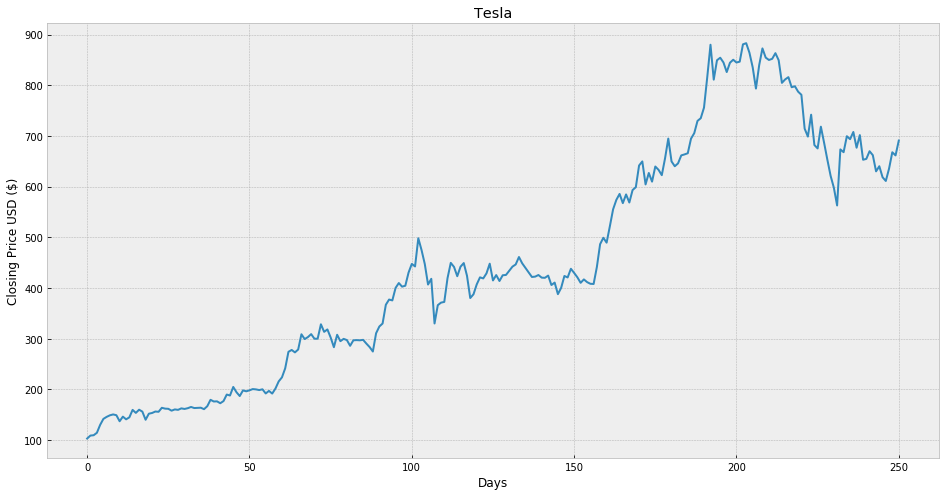

In [53]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [54]:
df=df[['Close']]
df.head()

,Close
0,103.248001
1,109.089996
2,109.767998
3,114.599998
4,130.190002


## Now predict 'x' days out into the future

In [55]:
futureDays=20
df['Prediction'] = df[['Close']].shift(-futureDays)
df.tail()

,Close,Prediction
246,611.289978,NaN
247,635.619995,NaN
248,667.929993,NaN
249,661.750000,NaN
250,691.049988,NaN


In [56]:
X= np.array(df.drop(['Prediction'],1))[:-futureDays]
print(X)
#did this to get rid of the NaN

[[103.248001]
 [109.089996]
 [109.767998]
 [114.599998]
 [130.190002]
 [141.977997]
 [145.966003]
 [149.042007]
 [150.778   ]
 [149.272003]
 [137.343994]
 [146.421997]
 [141.126007]
 [145.029999]
 [159.75    ]
 [153.824005]
 [160.102005]
 [156.376007]
 [140.264008]
 [152.238007]
 [153.641998]
 [156.516006]
 [156.007996]
 [163.884003]
 [162.257996]
 [161.882004]
 [158.192001]
 [160.666   ]
 [159.834   ]
 [162.725998]
 [161.602005]
 [163.112   ]
 [165.520004]
 [163.376007]
 [163.774002]
 [164.046005]
 [161.162003]
 [167.      ]
 [179.619995]
 [176.311996]
 [176.591995]
 [172.876007]
 [177.132004]
 [189.983994]
 [188.134003]
 [205.009995]
 [194.567993]
 [187.056   ]
 [198.179993]
 [196.425995]
 [198.358002]
 [200.792007]
 [200.179993]
 [198.863998]
 [200.356003]
 [192.169998]
 [197.195999]
 [191.947998]
 [201.869995]
 [215.962006]
 [223.925995]
 [241.731995]
 [274.31601 ]
 [277.971985]
 [273.175995]
 [278.855988]
 [308.929993]
 [299.411987]
 [303.359985]
 [309.201996]
 [300.127991]
 [300.

## Create the target data set (y) and convert it to a numpy array

In [57]:
y= np.array(df['Prediction'])[:-futureDays]
print(y)

[153.641998 156.516006 156.007996 163.884003 162.257996 161.882004
 158.192001 160.666    159.834    162.725998 161.602005 163.112
 165.520004 163.376007 163.774002 164.046005 161.162003 167.
 179.619995 176.311996 176.591995 172.876007 177.132004 189.983994
 188.134003 205.009995 194.567993 187.056    198.179993 196.425995
 198.358002 200.792007 200.179993 198.863998 200.356003 192.169998
 197.195999 191.947998 201.869995 215.962006 223.925995 241.731995
 274.31601  277.971985 273.175995 278.855988 308.929993 299.411987
 303.359985 309.201996 300.127991 300.167999 328.600006 313.671997
 318.466003 302.614014 283.399994 307.920013 295.298004 299.821991
 297.497986 286.152008 297.       297.399994 297.003998 297.915985
 290.541992 283.713989 274.877991 310.951996 324.200012 330.141998
 367.127991 377.417999 375.705994 400.365997 409.996002 402.839996
 404.667999 430.634003 447.75     442.679993 498.320007 475.049988
 447.369995 407.       418.320007 330.209991 366.279999 371.339996
 372

## Split the data into 75% training and 25% testing

In [58]:
x_train, x_test, y_train, y_test= train_test_split (X,y, test_size=0.25)

## Models

Decision Tree Regressor Model

In [59]:
tree= DecisionTreeRegressor().fit(x_train, y_train)

Linear Regressor Model

In [60]:
lr= LinearRegression().fit(x_train, y_train)

In [64]:
xFuture= df.drop(['Prediction'],1)[:-futureDays]
xFuture= xFuture.tail(futureDays)
xFuture= np.array(xFuture)
xFuture

array([[852.22998 ],
       [863.419983],
       [849.460022],
       [804.820007],
       [811.659973],
       [816.119995],
       [796.219971],
       [798.150024],
       [787.380005],
       [781.299988],
       [714.5     ],
       [698.840027],
       [742.02002 ],
       [682.219971],
       [675.5     ],
       [718.429993],
       [686.440002],
       [653.200012],
       [621.440002],
       [597.950012]])

In [66]:
treePrediction = tree.predict(xFuture)
print(treePrediction)
lrPrediction= lr.predict(xFuture)
print(lrPrediction)

[563.       673.580017 668.059998 849.460022 693.72998  707.940002
 701.809998 701.809998 654.869995 654.869995 670.       662.159973
 854.690002 635.619995 618.710022 611.289978 635.619995 667.929993
 661.75     691.049988]
[850.47822391 860.24919495 848.05953114 809.08042687 815.05299986
 818.94743544 801.57098271 803.25628092 793.85203467 788.54303967
 730.2141234  716.54003031 754.24426158 702.02760473 696.15980988
 733.64574426 705.71248316 676.68773852 648.95529396 628.4441277 ]


## Visualize 

Decision Tree

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


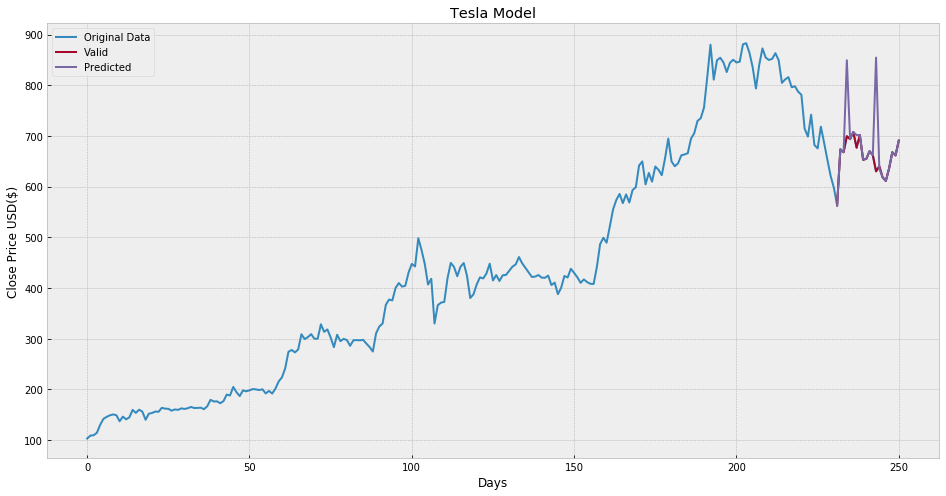

In [69]:
prediction= treePrediction
valid= df[X.shape[0]:]
valid['Predictions']= prediction
plt.figure(figsize=(16,8))
plt.title("Tesla Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid','Predicted'])

Linear Regression

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


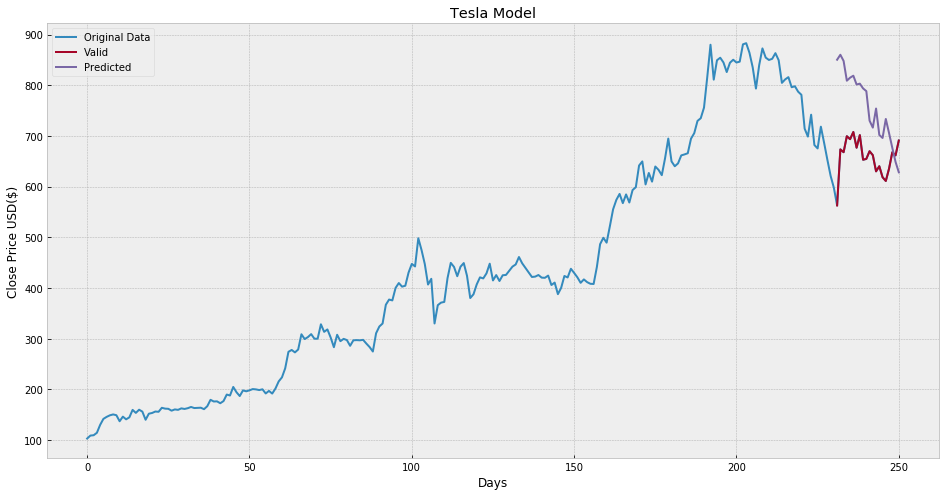

In [70]:
prediction= lrPrediction
valid= df[X.shape[0]:]
valid['Predictions']= prediction
plt.figure(figsize=(16,8))
plt.title("Tesla Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid','Predicted'])